In [ ]:
import pandas as pd
import numpy as np

In [ ]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

"""
Attribute Information:
    1.  CRIM      per capita crime rate by town
    2.  ZN        proportion of residential land zoned for lots over
                  25,000 sq.ft.
    3.  INDUS     proportion of non-retail business acres per town
    4.  CHAS      Charles River dummy variable (= 1 if tract bounds
                  river; 0 otherwise)
    5.  NOX       nitric oxides concentration (parts per 10 million)
    6.  RM        average number of rooms per dwelling
    7.  AGE       proportion of owner-occupied units built prior to 1940
    8.  DIS       weighted distances to five Boston employment centres
    9.  RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's
"""

"\nAttribute Information:\n    1.  CRIM      per capita crime rate by town\n    2.  ZN        proportion of residential land zoned for lots over \n                  25,000 sq.ft.\n    3.  INDUS     proportion of non-retail business acres per town\n    4.  CHAS      Charles River dummy variable (= 1 if tract bounds \n                  river; 0 otherwise)\n    5.  NOX       nitric oxides concentration (parts per 10 million)\n    6.  RM        average number of rooms per dwelling\n    7.  AGE       proportion of owner-occupied units built prior to 1940\n    8.  DIS       weighted distances to five Boston employment centres\n    9.  RAD       index of accessibility to radial highways\n    10. TAX       full-value property-tax rate per $10,000\n    11. PTRATIO   pupil-teacher ratio by town\n    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town\n    13. LSTAT     % lower status of the population\n    14. MEDV      Median value of owner-occupied homes in $1000's\n"

In [ ]:
print ('df is an object of ', type(df))
print ('\n')
print(df.head(5))
print(df.shape)

df is an object of  <class 'pandas.core.frame.DataFrame'>


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)


In [ ]:
y = df['PRICE'].values
x = df['RM'].values
print ('both x and y are now objects of', type(x))

both x and y are now objects of <class 'numpy.ndarray'>


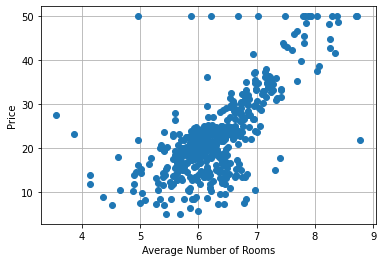

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

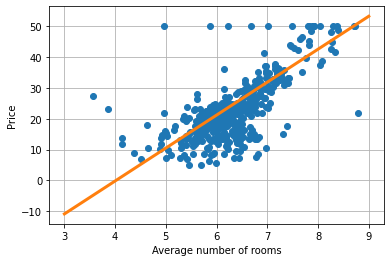

In [ ]:
w1 = 10.7
w0 = -43
xplt = np.linspace(3,9,100)
yplt = w1 * xplt + w0
plt.plot(x,y,'o')

plt.plot(xplt,yplt,'-',linewidth=3)
plt.xlabel('Average number of rooms')
plt.ylabel('Price')
plt.grid()


In [ ]:
yhat = 10.7*x - 43
mse = np.mean((y - yhat)**2)
mae = np.mean(np.abs(y - yhat))

print("mse: "+str(mse))
print("mae: "+str(mae))

mse: 47.79214952377469
mae: 4.66224446640316


[-34.67062078   9.10210898]
mse: 43.60055177116956
mae: 4.447772901532243


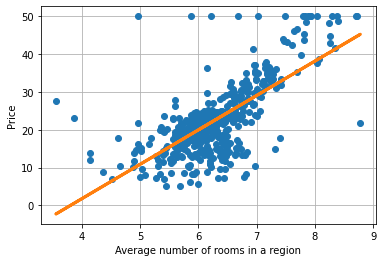

In [ ]:
ones = np.ones((x.shape[0],1))
X = np.hstack([ones, x.reshape((-1,1))])

w = np.linalg.inv(X.transpose()@X)@X.transpose()@y
print(w)

yhat = w[1] * x + w[0]
plt.plot(x,y,'o')

plt.plot(x,yhat,'-',linewidth=3)
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid()

mse = np.mean((y - yhat)**2)
mae = np.mean(np.abs(y - yhat))

print("mse: "+str(mse))
print("mae: "+str(mae))

In [ ]:
print((X.transpose()@X)@X.transpose()@y)
print(w)

[2.40849624e+08 1.53208138e+09]
[-34.67062078   9.10210898]


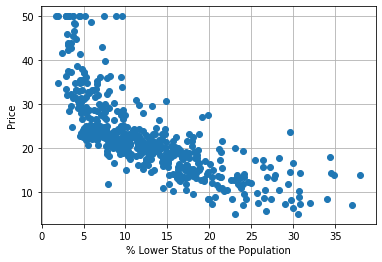

In [ ]:
x = df['LSTAT'].values
plt.plot(x,y,'o')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Price')
plt.grid()

mse: 99.67058557312252
mae: 9.15207509881423


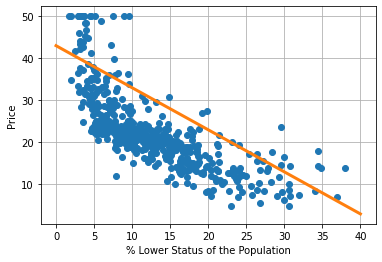

In [ ]:
w1 = -1
w0 = 43
xplt = np.linspace(0,40,100)
yplt = w1 * xplt + w0
plt.plot(x,y,'o')

plt.plot(xplt,yplt,'-',linewidth=3)
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Price')
plt.grid()

yhat = -1*x + 43
mse = np.mean((y - yhat)**2)
mae = np.mean(np.abs(y - yhat))

print("mse: "+str(mse))
print("mae: "+str(mae))

[34.55384088 -0.95004935]
mse: 38.48296722989415
mae: 4.505281166250558


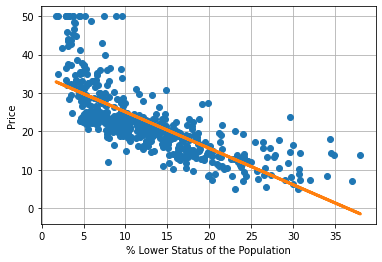

In [ ]:
ones = np.ones((x.shape[0],1))
X = np.hstack([ones, x.reshape((-1,1))])

w = np.linalg.inv(X.transpose()@X)@X.transpose()@y
print(w)

yhat = w[1] * x + w[0]
plt.plot(x,y,'o')

plt.plot(x,yhat,'-',linewidth=3)
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Price')
plt.grid()

mse = np.mean((y - yhat)**2)
mae = np.mean(np.abs(y - yhat))

print("mse: "+str(mse))
print("mae: "+str(mae))